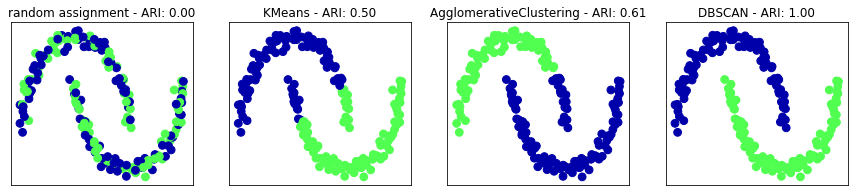

In [10]:
#let's start with adjusted rand index

from sklearn.metrics.cluster import adjusted_rand_score

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn

X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

fig, axes= plt.subplots(1,4,figsize=(15,3),
                      subplot_kw={'xticks':(),'yticks':()})

algorithms=[KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]

random_state=np.random.RandomState(seed=0)
random_clusters=random_state.randint(low=0,high=2,size=len(X))

axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn.cm3,s=60)
axes[0].set_title('random assignment - ARI: {:.2f}'.format(adjusted_rand_score(y,random_clusters)))

for ax,algorithm in zip(axes[1:],algorithms):
    clusters=algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y,clusters)))
    
plt.show()

In [ ]:
#note that ARI compares the cluster to the known cluster (y), typically we won't have that available

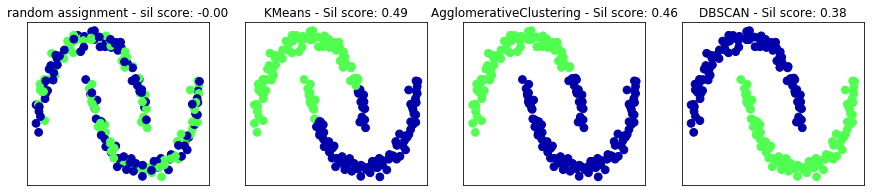

In [12]:
#let's try silhouette score

from sklearn.metrics.cluster import silhouette_score

X,y=make_moons(n_samples=200,noise=0.05,random_state=0)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

fig, axes= plt.subplots(1,4,figsize=(15,3),
                      subplot_kw={'xticks':(),'yticks':()})

algorithms=[KMeans(n_clusters=2),AgglomerativeClustering(n_clusters=2),DBSCAN()]

random_state=np.random.RandomState(seed=0)
random_clusters=random_state.randint(low=0,high=2,size=len(X))

axes[0].scatter(X_scaled[:,0],X_scaled[:,1],c=random_clusters,cmap=mglearn.cm3,s=60)
axes[0].set_title('random assignment - sil score: {:.2f}'.format(silhouette_score(X_scaled,random_clusters)))

for ax,algorithm in zip(axes[1:],algorithms):
    clusters=algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:,0],X_scaled[:,1],c=clusters,cmap=mglearn.cm3,s=60)
    ax.set_title("{} - Sil score: {:.2f}".format(algorithm.__class__.__name__, silhouette_score(X_scaled,clusters)))
    
plt.show()